# Bracking Indexing

In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]
1.21.5
1.4.2


In [2]:
# more complicated than indexing in numpy

### we need to pull value based on position & label

## Indexing wiht series

In [11]:
treats = pd.Series([x*2 for x in range(5)], index = ['mouse_{}'.format(x) for x in range(5)])
treats

mouse_0    0
mouse_1    2
mouse_2    4
mouse_3    6
mouse_4    8
dtype: int64

In [12]:
treats

mouse_0    0
mouse_1    2
mouse_2    4
mouse_3    6
mouse_4    8
dtype: int64

In [13]:
# you can use indexing very similar to numpy

In [17]:
# by position
treats[1]

2

In [18]:
# by label -- not possible in numpy

treats['mouse_1']

2

In [19]:
treats[['mouse_1', 'mouse_4']]

mouse_1    2
mouse_4    8
dtype: int64

In [20]:
treats> 3

mouse_0    False
mouse_1    False
mouse_2     True
mouse_3     True
mouse_4     True
dtype: bool

In [22]:
treats[treats>3]

mouse_2    4
mouse_3    6
mouse_4    8
dtype: int64

---

## slicing

### by position

In [24]:
treats[1:3]

mouse_1    2
mouse_2    4
dtype: int64

### by label

In [26]:
treats['mouse_1' : 'mouse_3']

mouse_1    2
mouse_2    4
mouse_3    6
dtype: int64

<font size = 5, color = red> Notice the slices did not work the same way

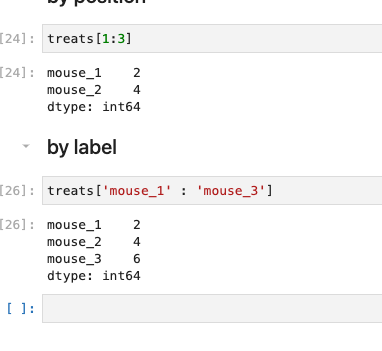

In [27]:
# normally a splice from 1-3 works in a specific way
# does not rtypically include the endpoing 3

### however slicing by label includes the last element as well (ie 1:3 is different)

---

# Indexing by dataframe

In [31]:
np.random.seed(200)

Mice = pd.DataFrame( np.random.geometric(.2, size = (5,5)),
                   columns = ['test_{}'.format(x) for x in range(5)],
                   index = ['mouse_{}'.format(x) for x in range(5)])
Mice

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,18
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


---

In [32]:
# simple index

In [34]:
Mice['test_1']

mouse_0     2
mouse_1     2
mouse_2    20
mouse_3     7
mouse_4     4
Name: test_1, dtype: int64

In [36]:
Mice.test_1

# works if there are no spaces or special chars

mouse_0     2
mouse_1     2
mouse_2    20
mouse_3     7
mouse_4     4
Name: test_1, dtype: int64

In [38]:
Mice[['test_1', 'test_4']]

,test_1,test_4
mouse_0,2,7
mouse_1,2,18
mouse_2,20,9
mouse_3,7,13
mouse_4,4,3


---

## Indexing can work differently at times

### boolean array

In [39]:
Mice.test_1 > 3

mouse_0    False
mouse_1    False
mouse_2     True
mouse_3     True
mouse_4     True
Name: test_1, dtype: bool

In [41]:
Mice[Mice.test_1 > 3]

,test_0,test_1,test_2,test_3,test_4
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


     And you can see what happens is we actually have filtered on the rows. This is kind of unexpected behavior. It may be a little bit surprising if this happens. 

In [42]:
# The contradiction is only because this boolean opeation is basic

---

### boolean array

In [44]:
np.random.seed(200)

Mice = pd.DataFrame( np.random.geometric(.2, size = (5,5)),
                   columns = ['test_{}'.format(x) for x in range(5)],
                   index = ['mouse_{}'.format(x) for x in range(5)])
Mice

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,18
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


In [45]:
# let us take all the values > 15 adn set them to 15

# maybe required for privacy purposes

In [46]:
Mice > 15

,test_0,test_1,test_2,test_3,test_4
mouse_0,False,False,False,False,False
mouse_1,False,False,False,False,True
mouse_2,False,True,False,False,False
mouse_3,False,False,False,False,False
mouse_4,False,False,False,False,False


In [47]:
Mice[Mice>15]

,test_0,test_1,test_2,test_3,test_4
mouse_0,NaN,NaN,NaN,NaN,NaN
mouse_1,NaN,NaN,NaN,NaN,18.0
mouse_2,NaN,20.0,NaN,NaN,NaN
mouse_3,NaN,NaN,NaN,NaN,NaN
mouse_4,NaN,NaN,NaN,NaN,NaN


In [48]:
Mice[Mice>15] = 15
Mice

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,15
mouse_2,10,15,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


---

### slices are matched up against rows

In [49]:
Mice[0:2]

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,15


In [50]:
Mice['mouse_0':'mouse_2']

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,15
mouse_2,10,15,12,2,9


In [52]:
# NOTE THE INDEX 2 is NOT INCLUDED when indexing by position
# BUT INCLUDED WHEN INDEXING BY LABEL